# Figure 1.
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/19/2025          |
| Updated |  08/19/2025          |

Visualizing the angular discretization within a finite-volume cell with global spherical coordinates $(r, \theta, \phi)$.
Arrows show the directional unit vectors $\hat{\mathbf{n}}$ used in equation (1).
Blue ones show the standard set described by Jiang ([2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract), $\S$ 3.2.4) for $N_\zeta = 1$ and $N_\psi = 2$ (Section 2.1).
Orange ones show the new pair $\hat{\mathbf{n}}_r$ aligned to the global radial direction $\hat{r}$ (Section 2.2).

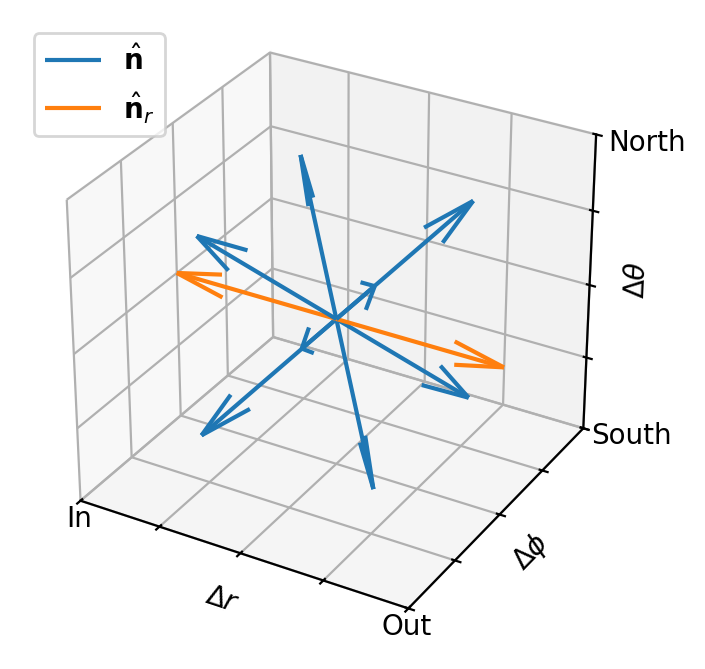

In [1]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np

def AngGrid(nzeta = 3, npsi = 2):
    fracs = np.arange((nzeta - 2), -1, -2)/nzeta
    thetaf = np.arccos(fracs)
    thetaf = np.append(thetaf, (np.pi-np.flip(thetaf)))
    thetaf = np.insert(thetaf, [0, thetaf.size], [0, np.pi])
    cos_thetaf = np.cos(thetaf)
    thetav = np.arccos((cos_thetaf[:-1] + cos_thetaf[1:])/2)
    phif = np.linspace(0, 2*np.pi, 2*npsi+1)
    phiv = (phif[:-1] + phif[1:])/2
    thetamesh, phimesh = np.meshgrid(thetav, phiv)
    mu_x = np.sin(thetamesh)*np.cos(phimesh)
    mu_y = np.sin(thetamesh)*np.sin(phimesh)
    mu_z = np.cos(thetamesh)

    return mu_x, mu_y, mu_z

# Make the grid
nzeta = 3
npsi = 2
mu_x, mu_y, mu_z = AngGrid(nzeta, npsi)
x, y, z = np.zeros_like(AngGrid(nzeta, npsi))

# Plot
ax = plt.figure(figsize=(4, 4), dpi=200).add_subplot(projection='3d')
ax.quiver(x[:,0], y[:,0], z[:,0], mu_x[:,0], mu_y[:,0], mu_z[:,0],
          label=r'$\hat{\mathbf{n}}$')
ax.quiver([0, 0], [0, 0], [0, 0], [-1, 1], [0, 0], [0, 0], color='tab:orange',
          label=r'$\hat{\mathbf{n}}_r$')
ax.quiver(x[:,2], y[:,2], z[:,2], mu_x[:,2], mu_y[:,2], mu_z[:,2])
ax.legend(loc='upper left')
ax.set(aspect='equal', xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1), 
       xticks=[-1, -0.5, 0, 0.5, 1], xticklabels=['In', '', '', '', 'Out'],
       yticks=[-1, -0.5, 0, 0.5, 1], yticklabels=[],
       zticks=[-1, -0.5, 0, 0.5, 1], zticklabels=['South', '', '', '', 'North'])
ax.set_xlabel(r'$\Delta r$', labelpad=-10)
ax.set_ylabel(r'$\Delta \phi$', labelpad=-10)
ax.set_zlabel(r'$\Delta \theta$', labelpad=-10)
ax.tick_params(axis='x', pad=-7)
plt.savefig(f'figs/angular_grid.pdf', bbox_inches='tight', pad_inches=0.01)
#===============================================================================